# Procedimiento ETL 2 - ETL Ratings jupyter, Produccion de df_merge

In [242]:
import pandas as pd


lista_csvs = [1, 2, 3, 4, 5, 6, 7, 8]

dfs = []

for element in lista_csvs:
    df_merged_rating_score = pd.read_csv(f"./Data/ratings/{element}.csv") # Lee el archivo CSV correspondiente
    dfs.append(df_merged_rating_score) # Agrega el dataframe a una lista de dataframes

result = pd.concat(dfs, ignore_index=True) # Concatena todos los dataframes en uno solo, ignorando los índices originales


# Guardar el dataframe como un archivo CSV
df_merged_rating_score.to_csv("./Data/ratings/csv_maestro.csv", mode='a', header=True, index=False)


In [243]:
df_merged_rating_score
df_merged_rating_score = df_merged_rating_score
df_merged_rating_score

,userId,rating,timestamp,movieId
0,108422,4.5,1350689762,as1399
1,108422,4.0,1350341401,as6724
2,108422,5.0,1350689691,ns512
3,108422,4.5,1350341088,ns7444
4,108422,4.5,1350689619,as2230
...,...,...,...,...
1499995,124380,4.5,1196786159,ns5272
1499996,124380,2.5,1196786030,ns5492
1499997,124380,3.5,1196785679,hs305
1499998,124380,4.5,1196787089,ns7881


__________________________________________________________________________________________________________________________________________________________

___________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________

# Analisis : Perspectiva x <span style='color:yellow'>userId</span>:

In [244]:
df_merged_rating_score

,userId,rating,timestamp,movieId
0,108422,4.5,1350689762,as1399
1,108422,4.0,1350341401,as6724
2,108422,5.0,1350689691,ns512
3,108422,4.5,1350341088,ns7444
4,108422,4.5,1350689619,as2230
...,...,...,...,...
1499995,124380,4.5,1196786159,ns5272
1499996,124380,2.5,1196786030,ns5492
1499997,124380,3.5,1196785679,hs305
1499998,124380,4.5,1196787089,ns7881


In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# agrupar por userId y obtener las películas vistas y sus votaciones
df_user_type = df_merged_rating_score.groupby('userId').agg({'movieId': list, 'rating': list})


df_user_type['cant_votaciones'] = df_merged_rating_score['userId'].value_counts()

# calcular la media de votaciones de cada usuario
df_user_type['media_votaciones'] = df_merged_rating_score.groupby('userId')['rating'].mean()

# calcular la distancia de cada votación a la media del usuario
df_user_type['distancia_media'] = df_merged_rating_score.groupby('userId')['rating'].apply(lambda x: abs(x - x.mean()).mean())
df_user_type['user_score'] = (df_user_type['cant_votaciones'] * df_user_type['media_votaciones'] * df_user_type['distancia_media'])

# Normalizar la columna 'user_score'
min_score = df_user_type['user_score'].min()
max_score = df_user_type['user_score'].max()
df_user_type['user_score'] = (df_user_type['user_score'] - min_score) / (max_score - min_score)

# mover la columna userId a la primera posición
df_user_type = df_user_type.reset_index()

# filtrar info ya innesesaria
df_user_type = df_user_type[['userId','user_score']]

df_user_type.head(10)

,userId,user_score
0,108422,0.005452
1,108423,0.266792
2,108424,0.000956
3,108425,0.001006
4,108426,0.059198
5,108427,0.006352
6,108428,0.000778
7,108429,0.004337
8,108430,0.001832
9,108431,0.004258


In [246]:
df_user_type.isnull().sum()


userId        0
user_score    0
dtype: int64

In [247]:
df_user_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15959 entries, 0 to 15958
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      15959 non-null  int64  
 1   user_score  15959 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 249.5 KB


In [248]:
df_user_type.describe()

,userId,user_score
count,15959.000000,15959.000000
mean,116401.000000,0.020096
std,4607.110808,0.040790
min,108422.000000,0.000000
25%,112411.500000,0.002873
50%,116401.000000,0.006613
75%,120390.500000,0.020068
max,124380.000000,1.000000


In [249]:
merged_df2 = pd.merge(df_user_type, df_merged_rating_score, on='userId')
merged_df2['rating_valorizado_user'] = merged_df2['rating'] * (1 + merged_df2['user_score']) 
merged_df2.drop(columns=['rating'], inplace=True)
merged_df2.drop(columns=['user_score'], inplace=True)
merged_df2

,userId,timestamp,movieId,rating_valorizado_user
0,108422,1350689762,as1399,4.524534
1,108422,1350341401,as6724,4.021808
2,108422,1350689691,ns512,5.027260
3,108422,1350341088,ns7444,4.524534
4,108422,1350689619,as2230,4.524534
...,...,...,...,...
1499995,124380,1196786159,ns5272,4.545441
1499996,124380,1196786030,ns5492,2.525245
1499997,124380,1196785679,hs305,3.535343
1499998,124380,1196787089,ns7881,4.545441


# Analisis : Perspectiva x <span style='color:green'>movieId</span>:

In [250]:

# Agrupar los datos por "movieId" y calcular las estadísticas
grouped = merged_df2.groupby('movieId', as_index=False).agg({
    'rating_valorizado_user': ['mean', 'count'],
})

# Renombrar las columnas para que sean más descriptivas
grouped.columns = ['movieId', 'mean_rating_valorizado_user', 'vote_count']

# Calcular el puntaje de cada película
grouped['rating_movie_user'] = (grouped['mean_rating_valorizado_user'] * grouped['vote_count']) 
grouped['rating_movie_user'] = grouped['rating_movie_user'].fillna(0)

# Normalizar la columna 'movie_score'
min_score = grouped['rating_movie_user'].min()
max_score = grouped['rating_movie_user'].max()
grouped['rating_movie_user'] = ((grouped['rating_movie_user'] - min_score) / (max_score - min_score))

# Imprimir los resultados
evolution_rating = grouped[['movieId','rating_movie_user']]
evolution_rating



,movieId,rating_movie_user
0,as1,0.477569
1,as10,0.350204
2,as100,0.432320
3,as1000,0.481329
4,as1001,0.468519
...,...,...
22993,ns995,0.402465
22994,ns996,0.522230
22995,ns997,0.407648
22996,ns998,0.553696


# hasta aca revise!
# ________________________________________________________________________________________________

### Falta crear matriz con base de datos peligulas x desglose en categoria mulltiplicado ese 1 de categoria x la valorizacion rating_movie_user

In [251]:
df_movies = pd.read_csv(f"./Data/Base_de_datos_aws_dp_hulu_netflix.csv") # Lee el archivo CSV correspondiente


C:\Users\Luca\AppData\Local\Temp\ipykernel_11836\1501701396.py:1: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv(f"./Data/Base_de_datos_aws_dp_hulu_netflix.csv") # Lee el archivo CSV correspondiente


In [252]:
df_movies.head(50)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...
1,as2,aws,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...
2,as3,aws,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...
3,as4,aws,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ..."
4,as5,aws,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45,min,"drama, fantasy",teenage matt banting wants to work with a famo...
5,as6,aws,movie,living with dinosaurs,paul weiland,"gregory chisholm, juliet stevenson, brian hens...",united kingdom,2021-03-30,1989,g,52,min,"fantasy, kids",the story unfolds in a an english seaside town...
6,as7,aws,movie,hired gun,fran strine,"alice cooper, liberty devitto, ray parker jr.,...",united states,2021-03-30,2017,g,98,min,"documentary, special interest","they are the ""first call, a-list"" musicians, j..."
7,as8,aws,movie,grease live!,"thomas kail, alex rudzinski","julianne hough, aaron tveit, vanessa hudgens, ...",united states,2021-03-30,2016,g,131,min,comedy,"this honest, uncompromising comedy chronicles ..."
8,as9,aws,movie,global meltdown,daniel gilboy,"michael paré, leanne khol young, patrick j. ma...",canada,2021-03-30,2017,g,87,min,"action, science fiction, suspense",a helicopter pilot and an environmental scient...
9,as10,aws,movie,david's mother,robert allan ackerman,"kirstie alley, sam waterston, stockard channing",united states,2021-04-01,1994,g,92,min,drama,sally goodson is a devoted mother to her autis...


In [253]:
evolution_rating = evolution_rating.rename(columns={'movieId': 'id'})


merged_df = df_movies.merge(evolution_rating, on='id')

merged_df

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,rating_movie_user
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,0.477569
1,as1,disney plus,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",unknown,2021-11-26,2016,tv-g,23,min,"animation, family",join mickey and the gang as they duck the halls!,0.477569
2,as1,netflix,movie,dick johnson is dead,kirsten johnson,unknown,united states,2021-09-25,2020,pg-13,90,min,documentaries,"as her father nears the end of his life, filmm...",0.477569
3,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,0.477569
4,as1,disney plus,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",unknown,2021-11-26,2016,tv-g,23,min,"animation, family",join mickey and the gang as they duck the halls!,0.477569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316921,as9668,aws,movie,harry brown,daniel barber,"michael caine, emily mortimer, joseph gilgun, ...",unknown,2021-07-14,2010,r,103,min,"action, drama, suspense","harry brown, starring two-time academy award w...",0.455882
316922,as9668,aws,movie,harry brown,daniel barber,"michael caine, emily mortimer, joseph gilgun, ...",unknown,2021-07-14,2010,r,103,min,"action, drama, suspense","harry brown, starring two-time academy award w...",0.455882
316923,as9668,aws,movie,harry brown,daniel barber,"michael caine, emily mortimer, joseph gilgun, ...",unknown,2021-07-14,2010,r,103,min,"action, drama, suspense","harry brown, starring two-time academy award w...",0.455882
316924,as9668,aws,movie,harry brown,daniel barber,"michael caine, emily mortimer, joseph gilgun, ...",unknown,2021-07-14,2010,r,103,min,"action, drama, suspense","harry brown, starring two-time academy award w...",0.455882


<Axes: xlabel='categories', ylabel='id'>

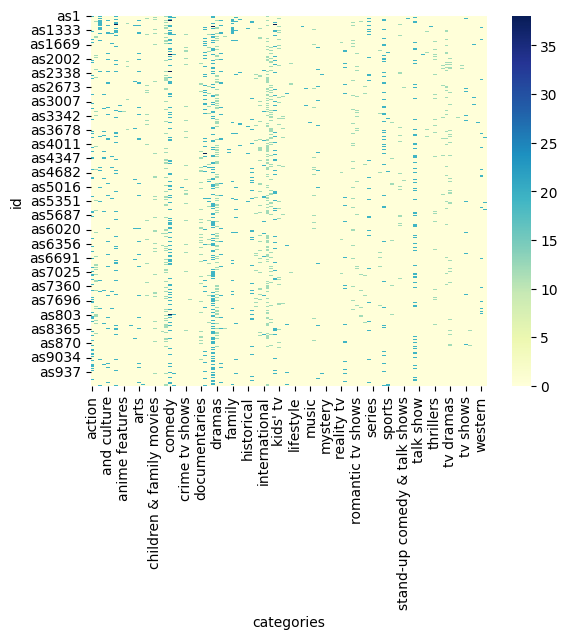

In [254]:
import pandas as pd
import seaborn as sns

# Step 1: Split the 'listed_in' column by commas
merged_df['categories'] = merged_df['listed_in'].str.split(', ')

# Step 2: Create a new dataframe with each movie-category pair
movie_categories = merged_df.explode('categories')[['id', 'categories']]

# Step 3: Use pivot_table to aggregate the frequency of each category for each movie
category_counts = pd.pivot_table(movie_categories, 
                                 index='id', 
                                 columns='categories', 
                                 aggfunc=len, 
                                 fill_value=0)

# Step 4: Create a heatmap of the category frequencies
sns.heatmap(category_counts, cmap='YlGnBu')


In [255]:
# Paso 1: Obtener una lista de todos los tópicos diferentes en la columna 'listed_in'
topics = set()
for category_list in merged_df['listed_in']:
    for category in category_list.split(', '):
        topics.add(category)
topics = list(topics)

# Paso 2: Crear una columna nueva en el dataframe 'merged_df' para cada tópico diferente
for topic in topics:
    merged_df[topic] = 0

# Paso 3: Establecer los valores de estas columnas en función de si el tópico correspondiente está presente en la columna 'listed_in' para esa película
for index, row in merged_df.iterrows():
    categories = row['listed_in'].split(', ')
    for category in categories:
        merged_df.at[index, category] = 1 * row['rating_movie_user']


C:\Users\Luca\AppData\Local\Temp\ipykernel_11836\934808618.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df[topic] = 0
C:\Users\Luca\AppData\Local\Temp\ipykernel_11836\934808618.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df[topic] = 0
C:\Users\Luca\AppData\Local\Temp\ipykernel_11836\934808618.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

In [256]:
merged_df.head(5)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,...,soap opera / melodrama,children & family movies,action,arts,romance,spy/espionage,adventure,superhero,sci-fi & fantasy,entertainment
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,as1,disney plus,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",unknown,2021-11-26,2016,tv-g,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,as1,netflix,movie,dick johnson is dead,kirsten johnson,unknown,united states,2021-09-25,2020,pg-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,as1,disney plus,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",unknown,2021-11-26,2016,tv-g,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
print(df_movies.columns)
print(evolution_rating.columns)
print(merged_df.columns)


Index(['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration_int', 'duration_type',
       'listed_in', 'description'],
      dtype='object')
Index(['id', 'rating_movie_user'], dtype='object')
Index(['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating',
       ...
       'soap opera / melodrama', 'children & family movies', 'action', 'arts',
       'romance', 'spy/espionage', 'adventure', 'superhero',
       'sci-fi & fantasy', 'entertainment'],
      dtype='object', length=118)


In [258]:
merged_df = merged_df.sort_values(by='rating_movie_user', ascending=False)

merged_df.head(10)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,...,soap opera / melodrama,children & family movies,action,arts,romance,spy/espionage,adventure,superhero,sci-fi & fantasy,entertainment
103517,as2451,netflix,tv show,midnight diner,unknown,"kaoru kobayashi, toshiki ayata, mansaku fuwa, ...",japan,2020-06-01,2014,tv-ma,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103509,as2451,netflix,tv show,midnight diner,unknown,"kaoru kobayashi, toshiki ayata, mansaku fuwa, ...",japan,2020-06-01,2014,tv-ma,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103507,as2451,netflix,tv show,midnight diner,unknown,"kaoru kobayashi, toshiki ayata, mansaku fuwa, ...",japan,2020-06-01,2014,tv-ma,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103506,as2451,aws,tv show,fluffy's food adventures,unknown,"gabriel iglesias, rick gutierrez, martin moreno",unknown,2021-07-14,2017,tv-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103505,as2451,netflix,tv show,midnight diner,unknown,"kaoru kobayashi, toshiki ayata, mansaku fuwa, ...",japan,2020-06-01,2014,tv-ma,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103504,as2451,aws,tv show,fluffy's food adventures,unknown,"gabriel iglesias, rick gutierrez, martin moreno",unknown,2021-07-14,2017,tv-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103502,as2451,aws,tv show,fluffy's food adventures,unknown,"gabriel iglesias, rick gutierrez, martin moreno",unknown,2021-07-14,2017,tv-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103501,as2451,netflix,tv show,midnight diner,unknown,"kaoru kobayashi, toshiki ayata, mansaku fuwa, ...",japan,2020-06-01,2014,tv-ma,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103500,as2451,aws,tv show,fluffy's food adventures,unknown,"gabriel iglesias, rick gutierrez, martin moreno",unknown,2021-07-14,2017,tv-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103510,as2451,aws,tv show,fluffy's food adventures,unknown,"gabriel iglesias, rick gutierrez, martin moreno",unknown,2021-07-14,2017,tv-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
# merged_df = merged_df.astype({
#     "id": "object",
#     "plataforma": "object",
#     "type": "category",
#     "title": "object",
#     "director": "object",
#     "cast": "object",
#     "country": "object",
#     "date_added": "datetime64[ns]",
#     "release_year": "int64",
#     "rating": "category",
#     "duration_int": "int64",
#     "duration_type": "category",
#     "listed_in": "object",
#     "description": "object",
#     "rating_movie_user": "float64"
# })


In [260]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316926 entries, 103517 to 32802
Columns: 118 entries, id to entertainment
dtypes: float64(103), object(15)
memory usage: 287.7+ MB


In [261]:
# Guardar el DataFrame en formato pickle
merged_df.to_pickle('./Data/merged.pickle')


__________________________________________________________________________________________________________________________________

In [262]:
merged_df.head(1)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,...,soap opera / melodrama,children & family movies,action,arts,romance,spy/espionage,adventure,superhero,sci-fi & fantasy,entertainment
103517,as2451,netflix,tv show,midnight diner,unknown,"kaoru kobayashi, toshiki ayata, mansaku fuwa, ...",japan,2020-06-01,2014,tv-ma,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



print(merged_df.columns)

In [263]:

print(merged_df.columns.tolist())

['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration_int', 'duration_type', 'listed_in', 'description', 'rating_movie_user', 'categories', 'comedies', 'independent movies', 'fantasy', 'teen tv shows', 'arthouse', 'musical', 'documentaries', 'stand-up comedy', 'tv horror', 'coming of age', 'korean tv shows', 'special interest', 'british tv shows', 'biographical', 'talk show', 'and culture', 'buddy', 'dramas', 'travel', 'crime tv shows', 'crime', 'thrillers', 'family', 'horror', 'romantic movies', 'tv sci-fi & fantasy', 'dance', 'international', 'cult movies', 'tv thrillers', 'unscripted', 'lgbtq movies', 'stand-up comedy & talk shows', 'tv shows', 'music videos and concerts', 'action & adventure', 'romantic comedy', 'tv dramas', "kids' tv", 'anthology', 'lifestyle', 'historical', 'comedy', 'kids', 'suspense', 'music', 'mystery', 'talk show and variety', 'variety', 'survival', 'lgbtq', 'medical', 'animals & nature', 'actio

In [264]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendation(titulo, n=1):
    # Obtener la película dada por su título
    pelicula = merged_df[merged_df['title'] == titulo].iloc[0]
    
    # Crear una lista con los títulos de todas las películas
    titulos = merged_df['title'].tolist()
    
    # Crear una matriz de recuento de términos de la columna "listed_in"
    vectorizer = CountVectorizer()
    generos_matriz = vectorizer.fit_transform(merged_df.iloc[:, 7:])

    
    # Obtener el índice de la película dada
    idx = titulos.index(titulo)
    
    # Obtener los vectores de características de todas las películas
    pelicula_features = generos_matriz[idx]
    features_matriz = generos_matriz
    
    # Calcular la similitud del coseno entre la película dada y todas las demás películas
    similarities = cosine_similarity(pelicula_features, features_matriz).flatten()
   
    # Obtener los índices de las películas más similares
    similar_indices = similarities.argsort()[-n-1:-1][::-1]
    
    # Obtener los títulos de las películas más similares
    similar_titulos = [titulos[i] for i in similar_indices]
    
    return similar_titulos

In [265]:
get_recommendation("lionheart")

['we bought a zoo']

In [266]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendation(titulo):
    # Obtener la película dada por su título
    pelicula = merged_df[merged_df['title'] == titulo].iloc[0]
    
    # Crear una lista con los títulos de todas las películas
    titulos = merged_df['title'].tolist()
    
    # Crear una matriz de recuento de términos de la columna "listed_in"
    vectorizer = CountVectorizer()
    generos_matriz = vectorizer.fit_transform(merged_df.iloc[:, 7:])
    
    # Obtener el índice de la película dada
    idx = titulos.index(titulo)
    
    # Obtener los vectores de características de todas las películas
    pelicula_features = generos_matriz[idx]
    features_matriz = generos_matriz
    
    # Calcular la similitud del coseno entre la película dada y todas las demás películas
    similarities = cosine_similarity(pelicula_features, features_matriz).flatten()
    
    # Obtener los índices de las películas más similares
    similar_indices = similarities.argsort()[-2:-1][::-1]
    
    # Obtener los títulos de las películas más similares
    similar_titulos = [titulos[i] for i in similar_indices]
    
    return similar_titulos


In [267]:
get_recommendation("lionheart")# pr ahora este

['we bought a zoo']

In [268]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendation(titulo):
    # Obtener la película dada por su título
    pelicula = merged_df[merged_df['title'] == titulo].iloc[0]
    
    # Crear una lista con los títulos de todas las películas
    titulos = merged_df['title'].tolist()
    
    # Crear una matriz de recuento de términos de la columna "listed_in"
    vectorizer = CountVectorizer()
    generos_matriz = vectorizer.fit_transform(merged_df.iloc[:, 7:])
    
    # Obtener el índice de la película dada
    idx = titulos.index(titulo)
    
    # Obtener los vectores de características de todas las películas
    pelicula_features = generos_matriz[idx]
    features_matriz = generos_matriz
    
    # Calcular la similitud del coseno entre la película dada y todas las demás películas
    similarities = cosine_similarity(pelicula_features, features_matriz).flatten()
    
    # Obtener los índices de las películas más similares
    similar_indices = similarities.argsort()[-20:-1][::-1]
    
    # Obtener los títulos de las películas más similares y sus valores de similitud
    similar_titulos = [titulos[i] for i in similar_indices]
    similaridades = [similarity for similarity in similarities[similar_indices]]
    recomendaciones = list(zip(similar_titulos, similaridades))
    
    return recomendaciones



In [269]:
get_recommendation("lionheart") #corroboro

[('we bought a zoo', 0.5773502691896258),
 ('wait for your laugh', 0.0),
 ('gad elmaleh: american dream', 0.0),
 ("fluffy's food adventures", 0.0),
 ('midnight diner', 0.0),
 ('lionheart', 0.0),
 ('lionheart', 0.0),
 ('lionheart', 0.0),
 ('lionheart', 0.0),
 ('gad elmaleh: american dream', 0.0),
 ('lionheart', 0.0),
 ('gad elmaleh: american dream', 0.0),
 ('lionheart', 0.0),
 ('lionheart', 0.0),
 ("fluffy's food adventures", 0.0),
 ('gad elmaleh: american dream', 0.0),
 ('lionheart', 0.0),
 ('gad elmaleh: american dream', 0.0),
 ('lionheart', 0.0)]

In [270]:
get_recommendation("lionheart")



[('we bought a zoo', 0.5773502691896258),
 ('wait for your laugh', 0.0),
 ('gad elmaleh: american dream', 0.0),
 ("fluffy's food adventures", 0.0),
 ('midnight diner', 0.0),
 ('lionheart', 0.0),
 ('lionheart', 0.0),
 ('lionheart', 0.0),
 ('lionheart', 0.0),
 ('gad elmaleh: american dream', 0.0),
 ('lionheart', 0.0),
 ('gad elmaleh: american dream', 0.0),
 ('lionheart', 0.0),
 ('lionheart', 0.0),
 ("fluffy's food adventures", 0.0),
 ('gad elmaleh: american dream', 0.0),
 ('lionheart', 0.0),
 ('gad elmaleh: american dream', 0.0),
 ('lionheart', 0.0)]

In [271]:
# mean_ratings = df_merged_rating_score.groupby('movieId')['rating'].mean()

# mean_ratings


_________________________________________________________________________________________________________________________________________________________________________

In [272]:
#df = pd.read_csv('./Data/merged.csv')
